##  Stacked Dielectric/Ferroelectric and Semiconductor with Depletion Carge Model

In [ ]:
# %load main_caller.py
"""
Main File. Invokes all solver functionality to solve the tensor-weighted Poisson equation. The displacement-field dependent Permittivity can be defined and the solver is ran.
"""

from __future__ import print_function
from refactor_solver import *
import numpy as np
from plot_differential_cap import *
from plot_results import *

# Import plot library
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

"""
User Input Part:

1. Define Geometry and Domains
2. Create Mesh or Read Mesh from File
3. Select Material and Carrier Models
4. Create a List of Bias Points
"""

# Define Device Variables
sem_width = 2.5 # [um] Width of the semiconductor channel
ins_width = 0.5 # [um] Width of the insulator layer
sem_relperm = 1 # Relative permittivity of semiconductor channel
doping = -35.2   # [C/um^2] Acceptor doping concentration
epsilon_FE = -3.2 # [] Initial Guess for out-of-plane FE permittivity
epsilon_0 = 1.0 #[F*um^-1]
z_thick = 1.0   #[um]

# Create a custom mesh and save it to a file or read it from a file
#360
mesh = RectangleMesh(Point(0,0), Point(1,3), 1, 380)

#Select supported carrier model: 'Depletion'
c_model = 'Depletion'

#Select supported Ferroelectric model: 'const_negative', 'saturation', 'S_curve'
FE_model = 'const_negative'

#Bias points
volt_list_ultra = [0.12] # [V]
volt_list_low = [float(x)/10 for x in range(2, 63, 9)] # [V]
volt_list_high = [float(x)/10 for x in range(73, 110, 25)] # [V]
volt_list = volt_list_ultra+volt_list_low+volt_list_high

# Main Function: Solve Problem for all defined bias points
Solution_points = []
Permittivity_points = []
TotalCharge_points = []

for idx, bias in enumerate(volt_list):

	print("Bias Point: " + str(bias)  +  " The index, at which the bias point is extracted: " + str(idx))	
	(u_v, C_v, Q_v) = run_solver(mesh, sem_width, sem_relperm, doping, bias)
	Solution_points.append(u_v)
	Permittivity_points.append(C_v)
	TotalCharge_points.append(Q_v)
	print("")


# Write Charge and voltage value in file
cap_dat = np.array([volt_list, TotalCharge_points])
cap_dat = cap_dat.T
print(cap_dat)
np.savetxt('capdata' + 'Model:_' + FE_model + '_' + str(epsilon_FE) + '.dat', cap_dat, fmt='%.3f')
plot_diff_cap('capdata' + 'Model:_' + FE_model + '_' + str(epsilon_FE) + '.dat')

# Plot the first (or any) bias point
u = Solution_points[3]
File('saved_u'+ 'Model:_' + FE_model + '_' + str(epsilon_FE) +'_.xml') << u

#plot_solution('saved_mesh.xml', 'saved_u'+ 'Model:_' + FE_model + '_' + str(epsilon_FE) +'_.xml')




In [ ]:
# %load plot_differential_cap.py
# Import plot library
import matplotlib.pyplot as plt
import matplotlib

# numpy library
import numpy as np

import sys

def plot_diff_cap(*filename):
	"Numerically differentiating and plotting capacitance"
	#General Plotting Settings
	font = {'weight' : 'bold',
      	  'size'   : 19}
	matplotlib.rc('font', **font)
	
	plt.figure(num=10, figsize=(16,12))

	for names in filename:
		f2 = open(names, 'r')

		lines = f2.readlines()
		f2.close()
	
		x1 = []
		y1 = []

		for line in lines:
			p = line.split()
			x1.append(float(p[0]))
			y1.append(float(p[1]))

		npV = np.array(x1)
		npQ = np.array(y1)
		dQdV = np.zeros(npV.shape, np.float)
		dQdV[0:-1] = -np.diff(npQ)/np.diff(npV)
		dQdV[-1] = -(npQ[-1] - npQ[-2])/(npV[-1] - npV[-2])
		plt.plot(npV, dQdV, linewidth=3, label = names)
		f2.close()

	plt.xlabel('Bias Voltage (V)')
	plt.ylabel('Differential Capacitance [F]')	
	plt.legend()
	plt.grid(True)
	plt.show()

if __name__ == "__main__":
	"Read Arguments from Terminal"
	first_arg = tuple(sys.argv[1:])
	plot_diff_cap(*first_arg)
	


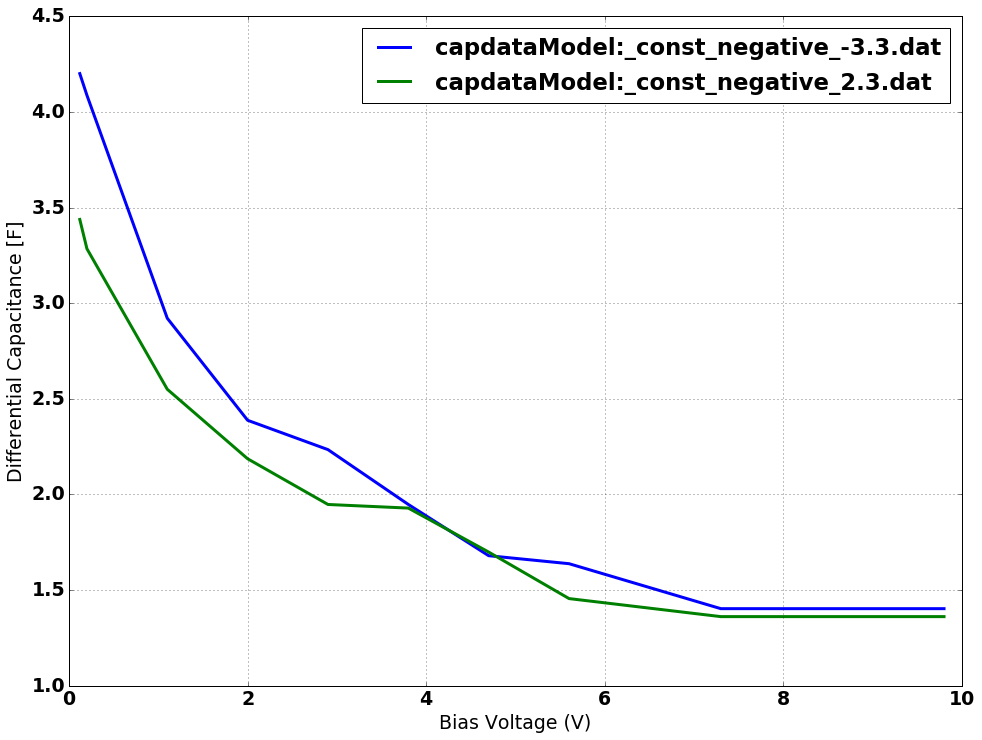

In [17]:
%run plot_differential_cap.py 'capdataModel:_const_negative_-3.3.dat' 'capdataModel:_const_negative_2.3.dat'

In [16]:
from plot_results import *

The y-component of the electric field at x=0.4 and y=0.61 is 0.00MV/cm
The x-component of the electric field at x=0.4 and y=0.61 is -0.00MV/cm
The Potential at x=0.4 and y=0.61 is 0.02V


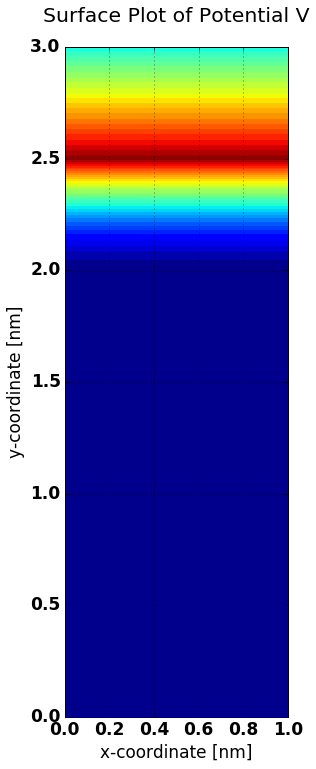

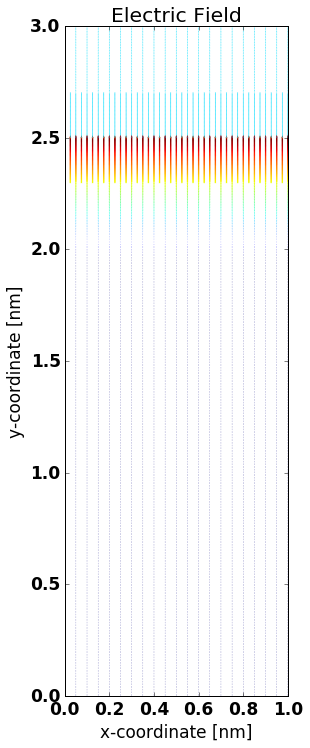

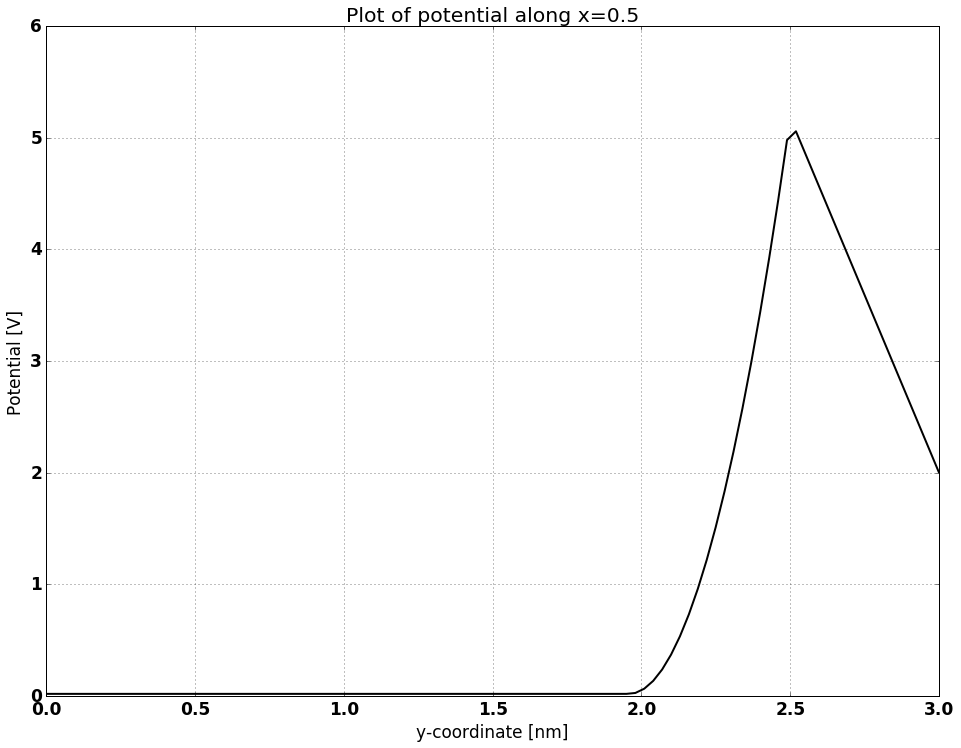

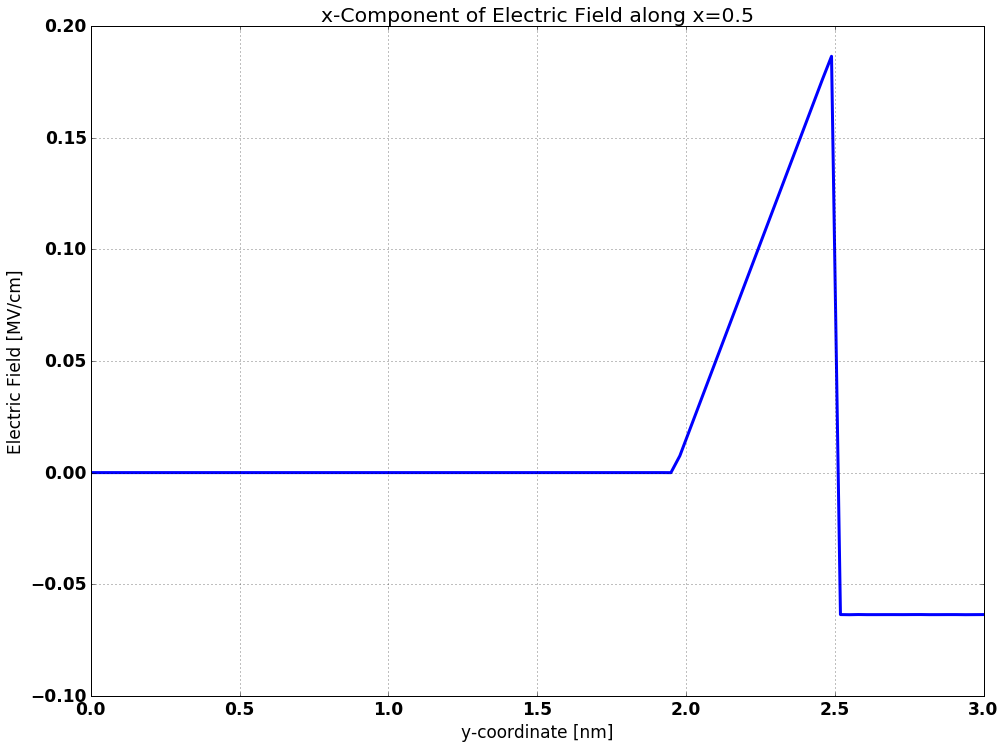

In [18]:
plot_solution('saved_mesh.xml', 'saved_u.xml')